In [1]:
--  Copyright (c) 2015, Omkar M. Parkhi
--  All rights reserved.
require 'image'
require 'nn'
net = torch.load('./VGG_FACE.t7')
net:evaluate()

In [2]:
im = image.load('./ak.png',3,'float')

In [3]:
im_scaled = image.scale(im,"224x224")
im_scaled = im_scaled*255
print(im_scaled[{{},1,1}])

 117.0000
  88.0000
  54.0000
[torch.FloatTensor of size 3]



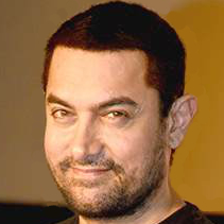

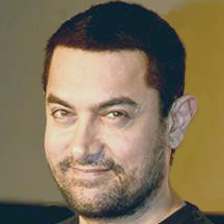

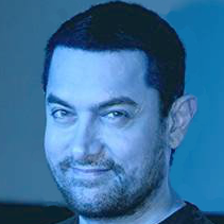

In [4]:
mean = {129.1863,104.7624,93.5940}
im_bgr = im_scaled:index(1,torch.LongTensor{3,2,1})
for i=1,3 do im_bgr[i]:add(-mean[i]) end
itorch.image(im_scaled)
for i=1,3 do im_scaled[i]:add(-mean[i]) end
itorch.image(im_scaled)
itorch.image(im_bgr)

In [5]:
im_bgr[{{},1,1}]

-75.1863
-16.7624
 23.4060
[torch.FloatTensor of size 3]



In [6]:
prob = net(im_bgr)
maxval,maxid = prob:sort(1)
print(maxid:min())
print(maxid[{{-5,-1}}])
print(maxval[{{-5,-1}}])
collectgarbage()

1	
  907
 1140
 1571
   19
    3
[torch.LongTensor of size 5]

 0.0011
 0.0016
 0.0033
 0.0052
 0.9606
[torch.FloatTensor of size 5]



In [7]:
net.modules[35] = nil 
net.modules[36] = nil 
net.modules[37] = nil 
net.modules[38] = nil 
net.modules[39] = nil 
net.modules[40] = nil 
collectgarbage()
net:evaluate()
prob = nil
prob = net(im_bgr)
print(prob:size())
print(prob[{1}])


 4096
[torch.LongStorage of size 1]

1.9217433929443	


In [8]:
net.modules[32] = nil 
net.modules[33] = nil 
net.modules[34] = nil 
net.modules[35] = nil 
net.modules[36] = nil 
net.modules[37] = nil 
net.modules[38] = nil 
net.modules[39] = nil 
net.modules[40] = nil 
collectgarbage()
net:evaluate()
prob = nil
prob = net(im_bgr)
print(prob:size())
print(prob[{1,{},{}}])

In [9]:
print(prob[{123,{},{}}])


 512
   7
   7
[torch.LongStorage of size 3]

  0.9983   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 13.7408   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 44.8974   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 49.6612   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 30.1439   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
  0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
  0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
[torch.FloatTensor of size 7x7]



   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
   0.0000    0.6421   78.1488   87.4373    9.4757    0.0000    0.0000
   0.0000    0.0000  106.4622   86.8216    0.0000    0.0000    0.0000
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
[torch.FloatTensor of size 7x7]

